In [1]:
import pandas as pd
import glob
from graph_tool.all import *; import graph_tool.all as gt
import gravis as gv
import numpy as np
from tqdm import tqdm
from bs4 import BeautifulSoup
import seaborn as sns

import os
print(os.getcwd())


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


/Users/sam/Desktop/james-interactive-graph/code/graph


In [4]:
df = pd.read_csv('../simulated_data/simulated_data.csv',index_col=0)
df.head()

,username,icon,Trial name,First name,Last name,DOB,Address,Latitute,Longitude,Postcode,...,Forum User,Symptom Logger,Frequent Check In,Diamond Forum Contributor,Big App Engagement,Appointment Attendance,7 Day Symptom Logger,Has Logged Symptoms,Checking In,Ruby Contributor
0,excitedEggs9,../../assets/icons/penguin_6267086.png,MindfulAI,Bonnie,Lapalme,1984-06-02,89 Harris tunnel\nEast Nicola\nMK9X 6NU,-32.140471,-173.581318,WF6 3AH,...,../../assets/badges/forum_user.png,NaN,NaN,../../assets/badges/diamond_forum_contributor.png,NaN,NaN,NaN,NaN,NaN,NaN
1,gloomyChough7,../../assets/icons/snake_1067840.png,MindfulAI,Donald,Nelson,1982-04-07,Studio 5\nJordan cove\nOwenshire\nW96 8PP,17.673140,-6.882827,ZE3E 4PJ,...,NaN,../../assets/badges/symptom_logger.png,../../assets/badges/frequent_check_in.png,../../assets/badges/diamond_forum_contributor.png,NaN,NaN,NaN,NaN,NaN,../../assets/badges/ruby_contributor.png
2,ashamedGelding7,../../assets/icons/walrus_9308957.png,MindfulAI,Kenneth,Turner,1986-12-09,Studio 24\nJulian fields\nEast Julie\nRG92 7FZ,-17.966391,76.832105,G5 0UG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,../../assets/badges/has_logged_symptoms.png,NaN,../../assets/badges/ruby_contributor.png
3,humorousEland6,../../assets/icons/monkey_1998721.png,MindfulAI,Robert,Ortiz,1993-06-30,Studio 99\nNixon locks\nPort Charlesville\nM6 4XD,41.682658,-125.328700,S6F 5PQ,...,NaN,NaN,NaN,../../assets/badges/diamond_forum_contributor.png,../../assets/badges/big_app_engagement.png,NaN,../../assets/badges/7_day_symptom_logger.png,NaN,NaN,NaN
4,sugaryOryx1,../../assets/icons/lion_2298426.png,MindfulAI,Lorraine,Torres,1973-11-27,Studio 32w\nRogers street\nHarveyfurt\nS9 1QH,-42.644311,-23.397303,NE64 8AA,...,../../assets/badges/forum_user.png,NaN,NaN,NaN,../../assets/badges/big_app_engagement.png,NaN,../../assets/badges/7_day_symptom_logger.png,NaN,NaN,NaN


In [5]:
# #simulate award badges for users
# #similar to git achievements
badge_list = []
badges = glob.glob('../../assets/badges/*png')
for b in range(len(badges)):
    png = badges[b]
    badge_list.append(badges[b].split('/')[-1].split('.')[0].replace("_", " ").title())

In [4]:
g = Graph(directed=False)
username = g.new_vertex_property("string")
icon = g.new_vertex_property("string")
trial_name = g.new_vertex_property("string")
online_status=g.new_vertex_property("string")
total_points=g.new_vertex_property('int')
total_attendance_points=g.new_vertex_property('int')
total_log_points=g.new_vertex_property('int')
total_check_in_points=g.new_vertex_property('int')
total_answered_question_points=g.new_vertex_property('int')
total_spoke_to_bot_points=g.new_vertex_property('int')
badges = g.new_vertex_property("string")

for v, row in df.iterrows():
    node = g.add_vertex()
    username[v]=(row['username'])
    icon[v]=(row['icon'])
    trial_name[v]=(row['Trial name'])
    online_status[v]=(np.random.choice(['No','Yes'], p=[0.3,0.7]))
    total_points[v]=(row['Total points'])
    total_attendance_points[v]=(row['Total attendance points'])
    total_log_points[v]=(row['Total log points'])
    total_check_in_points[v]=(row['Total check in points'])
    total_answered_question_points[v]=(row['Total answered question points'])
    total_spoke_to_bot_points[v]=(row['Total spoke to bot points'])
    badges_won = row[badge_list][row[badge_list].notnull()]
    if len(badges_won)>0:
        badges[v]='<br><center>'
        for b in badges_won:
            badges[v]+='<img src='+b+' style="margin:10px;max-height:40px;max-width:40px;"></img>'
        badges[v]+='</center>'
    else:
        badges[v]=''
    
g.vp["username"]=username
g.vp["image"]=icon
g.vp["trial_name"]=trial_name
g.vp["online_status"]=online_status
g.vp["total_points"]=total_points
g.vp["total_attendance_points"]=total_attendance_points
g.vp["total_log_points"]=total_log_points
g.vp["total_check_in_points"]=total_check_in_points
g.vp["total_answered_question_points"]=total_answered_question_points
g.vp["total_spoke_to_bot_points"]=total_spoke_to_bot_points

print("Nodes primed!")
print("")
print(g)

Nodes primed!

<Graph object, undirected, with 150 vertices and 0 edges, 10 internal vertex properties, at 0x2a357e050>


quick point comparison heatmap...


<Axes: >

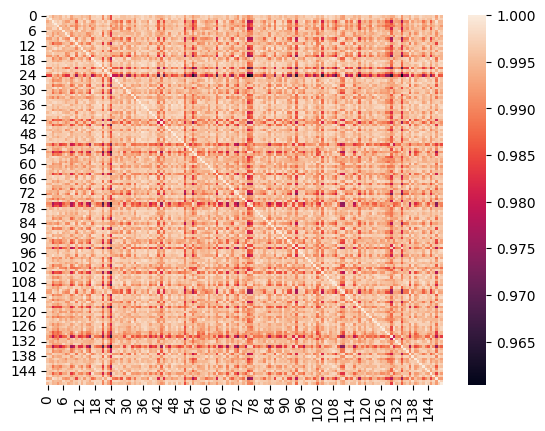

In [5]:
point_comparison = df.filter(regex='Cumulative|username').iloc[:,1:]
adj = point_comparison.T
adj = adj.corr().values

print("quick point comparison heatmap...")
sns.heatmap(adj)

In [6]:
idx = adj.nonzero()
weights = adj[idx]
g.add_edge_list(np.transpose(idx))

ew = g.new_ep("double")
ew.a = weights 
g.ep['weight'] = ew

gt.remove_self_loops(g)

tree = gt.min_spanning_tree(g,weights=g.ep.weight)
g.ep["minspanningtree"] = tree

g.save("participant_graph.xml.gz")
print(g)

thresh = np.percentile(g.ep.weight.get_array(),97)
edge_filter = g.new_edge_property("bool") 
for e in g.edges(): 
        if g.ep.weight[e] > thresh:
            edge_filter[e] = True 
        else: 
            edge_filter[e] = False 
g.edge_properties["edge_filter"]=edge_filter

# g.set_edge_filter(tree)
g.set_edge_filter(g.ep['edge_filter'])
print(g)

<Graph object, undirected, with 150 vertices and 22350 edges, 10 internal vertex properties, 2 internal edge properties, at 0x2a357e050>
<Graph object, undirected, with 150 vertices and 524 edges, 10 internal vertex properties, 3 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2a357e050, at 0x2b5398810>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2a357e050, at 0x2b55498d0>, False), at 0x2a357e050>


In [7]:
# fname = 'participant_graph_d3_js.html'
# fname = '../../assets/participant_graph_d3_js.html'

fname = "../../index.html"
if len(glob.glob(fname))>0:
    os.remove(fname)
    
g.vp['color'] = g.new_vp('string')
g.vp['hover'] = g.new_vp('string')
# g.vp['click'] = g.new_vp('string')
# g.vp['image'] = g.new_vp('string')
g.vp['opacity'] = g.new_vp('float')

for v in tqdm(g.vertices(),total=g.num_vertices()):
    fname_image = g.vp['image'][v]
    g.vp['hover'][v] = '<center><strong>'+str(g.vp['username'][v])+'\nTotal points: '+str(g.vp['total_points'][v])+'\n</center></strong>'
    g.vp['hover'][v]+='<br><center><img src='+fname_image+' style="margin:10px;max-height:150px;max-width:150px;"></img>'
    g.vp['hover'][v]+=badges[v]
    g.vp['opacity'][v]=0.5
    
    #random online, offline color symboliser, offline = #ffb3ba/first
    g.vp['color'][v]=np.random.choice(['#ffb3ba','#baffc9'], p=[0.7,0.3])


g.gp['background_color'] = g.new_gp('string', val='#bae1ff')
g.gp['opacity'] = g.new_gp('double', val=0.1)

fig = gv.d3(g,
#   graph_height=800, 
#   details_height=450,
            show_details=False,
show_details_toggle_button=False,
#   zoom_factor=0.3,
  use_node_size_normalization=True,
  use_edge_size_normalization=True,
  node_size_data_source='total_points',\
  node_label_data_source='username',
    edge_size_data_source='weight',
  edge_label_data_source='weight',
 show_node_label=False, 
 node_hover_neighborhood=True,
 show_node_label_border=False,
#  node_label_size_factor=0.55,
 use_many_body_force=True,
#  edge_curvature=0.3,
  show_edge_label=False,
   show_edge_label_border=True,
#     many_body_force_strength=- 150.0,
        use_collision_force=True,
#   node_size_normalization_min=node_size_minima,
# node_size_normalization_max=25,
#   edge_size_normalization_min=0.01,
# edge_size_normalization_max=15,
layout_algorithm_active=True,
#             links_force_distance=450,
 )

fig.export_html(fname)
del fig

100%|██████████████████████████████████████| 150/150 [00:00<00:00, 44699.51it/s]


In [4]:
print("Now adjusting the HTML file for asset location, font, and []...")
fname = "/Users/sam/Desktop/james-interactive-graph/index.html"
# Open test.html for reading
with open(fname) as html_file:
    soup = BeautifulSoup(html_file.read(), features='html.parser')

replaceString = 'assets/'
new_text = str(soup).replace('"Lucida Console", Monaco, monospace','"sans-serif"')

#may need this later for dependency changes
new_text = str(soup).replace("../../assets/", replaceString)
# new_text = str(soup).replace("/code/assets/", replaceString)

new_text = new_text.replace('font-size: 8px','font-size: 15px')
new_text = new_text.replace('font-size: 10px','font-size: 15px')
new_text = new_text.replace('font-size: 9px','font-size: 15px')
new_text = new_text.replace('font-size: 11px','font-size: 15px')

new_text = BeautifulSoup(new_text).prettify()
with open(fname, mode='w') as new_html_file:
    new_html_file.write(new_text)

Now adjusting the HTML file for asset location, font, and []...
